In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, AvgPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
train_datagen = ImageDataGenerator(
    validation_split=0.25,
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2)

validation_datagen = ImageDataGenerator(
    validation_split=0.25,
    rescale=1./255,
    # horizontal_flip=True,
    # vertical_flip=True,
    # rotation_range=90,
    # width_shift_range=0.2,
    # height_shift_range=0.2
)

train_datagen_flow = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/МГУ_тестовое/imgs_details/train',
    target_size=(150, 150),
    #batch_size=33,
    batch_size=1,
    class_mode='binary',
    subset='training',
    seed=12345)

val_datagen_flow = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/МГУ_тестовое/imgs_details/train',
    target_size=(150, 150),
    #batch_size=10,
    batch_size=1,
    class_mode='binary',
    subset='validation',
    seed=12345) 

datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/МГУ_тестовое/imgs_details/test',
    target_size=(150, 150),
    #batch_size=21,
    batch_size=1,
    class_mode='binary')


Found 33 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [7]:
history_cnn = model.fit_generator(
    train_datagen_flow,
    steps_per_epoch=33,
    epochs=20,
    validation_data=val_datagen_flow,
    validation_steps=10,
    callbacks=[checkpoint_callback_cnn])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
33/33 [==============================] - 13s 297ms/step - loss: 0.8040 - accuracy: 0.6061 - val_loss: 0.6734 - val_accuracy: 0.6000

Epoch 00001: val_accuracy improved from -inf to 0.60000, saving model to best_model_cnn.h5
Epoch 2/20
33/33 [==============================] - 10s 297ms/step - loss: 0.9118 - accuracy: 0.6364 - val_loss: 0.7284 - val_accuracy: 0.6000

Epoch 00002: val_accuracy did not improve from 0.60000
Epoch 3/20
33/33 [==============================] - 9s 290ms/step - loss: 0.8888 - accuracy: 0.6061 - val_loss: 0.6852 - val_accuracy: 0.6000

Epoch 00003: val_accuracy did not improve from 0.60000
Epoch 4/20
33/33 [==============================] - 10s 292ms/step - loss: 0.7374 - accuracy: 0.4545 - val_loss: 0.6918 - val_accuracy: 0.9000

Epoch 00004: val_accuracy improved from 0.60000 to 0.90000, saving model to best_model_cnn.h5
Epoch 5/20
33/33 [==============================] - 10s 292ms/step - loss: 0.7202 - accuracy: 0.5152 - val_loss: 0.7613 - val_accu

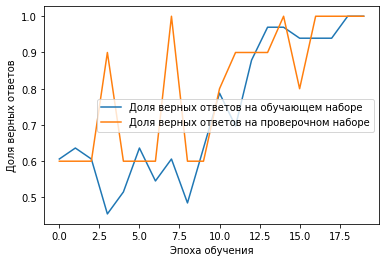

In [8]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [9]:
scores = model.evaluate_generator(test_generator, 1)
print("Accuracy на тестовой выборке: %.2f%%" % (scores[1]*100))
scores

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1996: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy на тестовой выборке: 100.00%


[0.05937409773468971, 1.0]